In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_df = pd.read_csv("../data/KDDTrain+.txt", header=None)


In [2]:
column_names = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
    "wrong_fragment","urgent","hot","num_failed_logins","logged_in",
    "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
    "num_shells","num_access_files","num_outbound_cmds","is_host_login",
    "is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
    "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
    "srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
    "dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate",
    "label","difficulty"
]

train_df.columns = column_names


In [3]:
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  str    
 2   service                      125973 non-null  str    
 3   flag                         125973 non-null  str    
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13  root_shell

In [4]:
print(train_df.isnull().sum().sum())# means there is no missing values


0


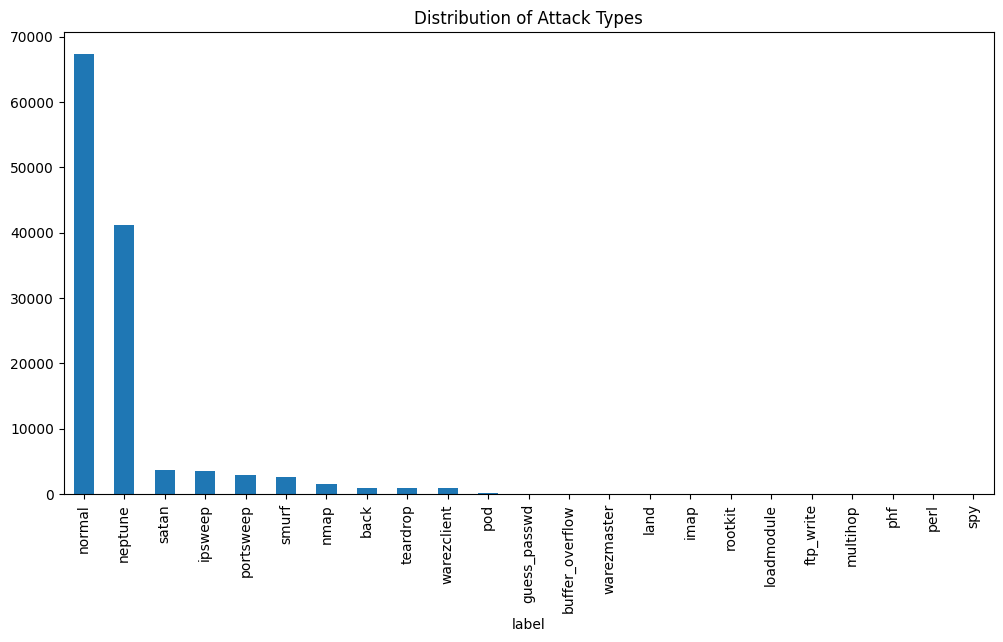

In [5]:
plt.figure(figsize=(12,6))
train_df["label"].value_counts().plot(kind="bar")
plt.title("Distribution of Attack Types")
plt.show()


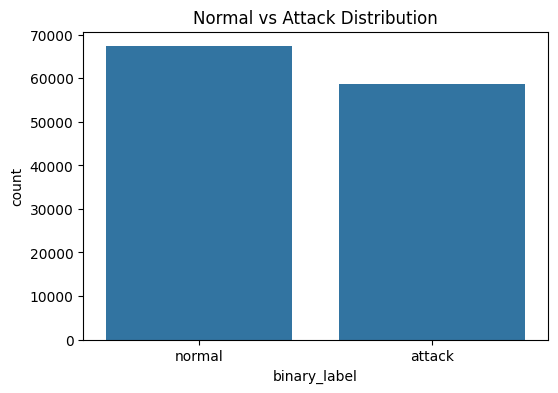

In [6]:
train_df['binary_label']=train_df['label'].apply(lambda x:'normal' if x=='normal' else 'attack')
plt.figure(figsize=(6,4))
sns.countplot(x="binary_label", data=train_df)
plt.title("Normal vs Attack Distribution")
plt.show()

In [7]:
##binary distribution is comparatively balanced than the multi class one

In [8]:
categorical_columns=['protocol_type','service','flag']
for col in categorical_columns:
    print(col)
    print(train_df[col].value_counts().head())

protocol_type
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64
service
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64
flag
flag
SF      74945
S0      34851
REJ     11233
RSTR     2421
RSTO     1562
Name: count, dtype: int64


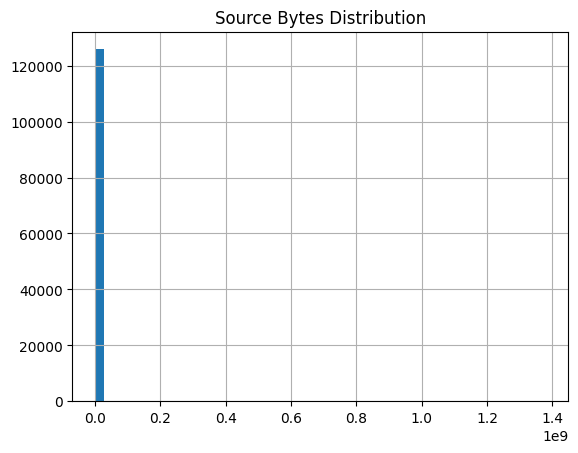

In [9]:
#lets see on the numerical features (as an example) for looking (is there skewness like or not in the data?)
train_df["src_bytes"].hist(bins=50)
plt.title("Source Bytes Distribution")
plt.show()


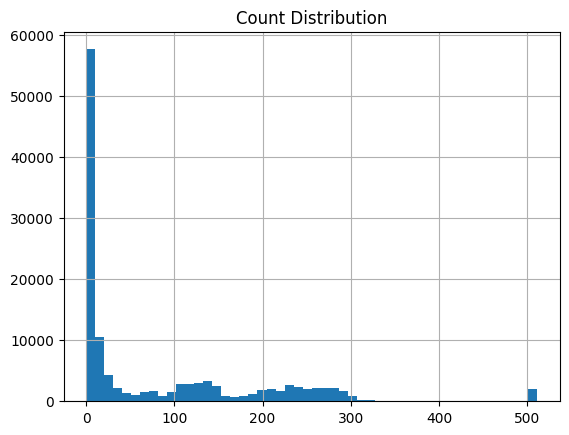

In [10]:
train_df["count"].hist(bins=50)
plt.title("Count Distribution")
plt.show()

In [11]:
##the above two are just the examples showing that there is heavy skewness

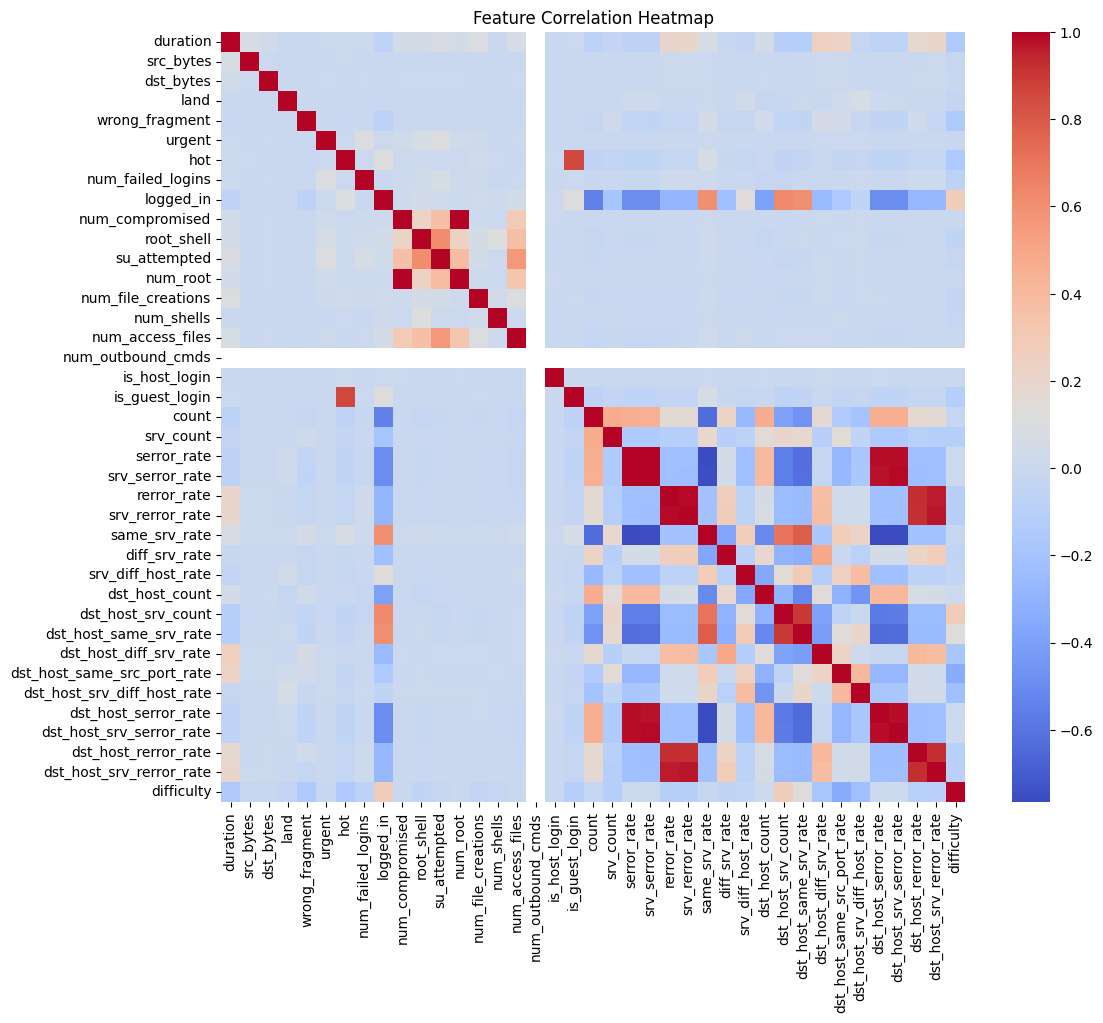

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
# #red block means strongly positive correlated(if one increases , other also increases)
# # blue shows negative correlation
# # when two features are highly correlated they give similar information and can confuse the linear models

# serror_rate and srv_serror_rate
# rerror_rate and srv_rerror_rate
# dst_host_serror_rate and dst_host_srv_serror_rate
# dst_host_rerror_rate and dst_host_srv_rerror_rate
# These appear strongly correlated (deep red).